## Comprehensive data exploration
 After scarping data from tripadvisor about all hotel in France, we are going to explore and clean this data.


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('data_All_Hotels_France(2).xlsx', sheet_name='Sheet1')

In [3]:
data.head()

,Unnamed: 0,Link,name,address,number,hotel_experience,Price,review,rating,amenities,rank,Description,Grade_walkers,N_nearRestaurants,N_nearAttractions,Note_Location,Note_Cleanliness,Note_Service,Note_Value,Src_image
0,0,https://www.tripadvisor.com/Hotel_Review-g2073...,Hotel Saint Guirec et de la Plage,"162 rue de Saint Guirec, 22700, Perros-Guirec ...",None,Excellent,€75,619 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#4 of 24 hotels in Perros-Guirec,See why so many travelers make Hotel Saint Gui...,75 out of 100,15,12,4.9,4.4,4.3,4.1,https://dynamic-media-cdn.tripadvisor.com/medi...
1,1,https://www.tripadvisor.com/Hotel_Review-g1870...,Le Boutique Hotel & Spa,"3 Rue Lafaurie de Monbadon, 33000, Bordeaux Fr...",0519100370,Excellent,NaN,"1,291 reviews",4.5,"['Paid public parking nearby', 'Free High Spee...",#9 of 194 hotels in Bordeaux,Le Boutique Hotel Bordeaux is situated in a ma...,100 out of 100,256,86,4.8,4.7,4.7,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
2,2,https://www.tripadvisor.com/Hotel_Review-g9683...,Jiva Hill Resort,"Route d'Haree, 01170 Crozet France",0481922758,Excellent,€235,606 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#1 of 2 hotels in Crozet,Nous avons en effet mis en œuvre et formé nos ...,None,None,None,4.5,4.8,4.5,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
3,3,https://www.tripadvisor.com/Hotel_Review-g2192...,Chateau Les Oliviers De Salettes,"1205 route du Chateau, 26450 Charols France",None,Excellent,€130,751 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",None,After three years of renovations and meticulou...,None,None,None,4.7,4.6,4.4,4.2,https://dynamic-media-cdn.tripadvisor.com/medi...
4,4,https://www.tripadvisor.com/Hotel_Review-g1182...,Best Western Hotel Nuit de Retz,"Rue du Grand Pre Zone de Loisirs, 44710 Port-S...",None,Excellent,€90,271 reviews,4.5,"['Free parking', 'Free High Speed Internet (Wi...",#1 of 3 B&Bs / Inns in Port-Saint-Pere,Everyone needs a place to lay their weary head...,None,None,None,4.2,4.8,4.7,4.6,https://dynamic-media-cdn.tripadvisor.com/medi...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2904 non-null   int64  
 1   Link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             2904 non-null   object 
 5   hotel_experience   2904 non-null   object 
 6   Price              1219 non-null   object 
 7   review             2904 non-null   object 
 8   rating             2904 non-null   object 
 9   amenities          2904 non-null   object 
 10  rank               2904 non-null   object 
 11  Description        2902 non-null   object 
 12  Grade_walkers      2904 non-null   object 
 13  N_nearRestaurants  2904 non-null   object 
 14  N_nearAttractions  2904 non-null   object 
 15  Note_Location      2901 non-null   float64
 16  Note_Cleanliness   2900 

## Variable name

In [5]:
data.columns

Index(['Unnamed: 0', 'Link', 'name', 'address', 'number', 'hotel_experience',
       'Price', 'review', 'rating', 'amenities', 'rank', 'Description',
       'Grade_walkers', 'N_nearRestaurants', 'N_nearAttractions',
       'Note_Location', 'Note_Cleanliness', 'Note_Service', 'Note_Value',
       'Src_image'],
      dtype='object')

In [6]:
name_map = {col_name:col_name.lower() for col_name in data.columns  }

In [7]:
name_map

{'Unnamed: 0': 'unnamed: 0',
 'Link': 'link',
 'name': 'name',
 'address': 'address',
 'number': 'number',
 'hotel_experience': 'hotel_experience',
 'Price': 'price',
 'review': 'review',
 'rating': 'rating',
 'amenities': 'amenities',
 'rank': 'rank',
 'Description': 'description',
 'Grade_walkers': 'grade_walkers',
 'N_nearRestaurants': 'n_nearrestaurants',
 'N_nearAttractions': 'n_nearattractions',
 'Note_Location': 'note_location',
 'Note_Cleanliness': 'note_cleanliness',
 'Note_Service': 'note_service',
 'Note_Value': 'note_value',
 'Src_image': 'src_image'}

In [8]:
name_map['Unnamed: 0'] = 'hotel_id'

In [9]:
data.rename(name_map, axis=1, inplace=True)

## Variable type

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           2904 non-null   int64  
 1   link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             2904 non-null   object 
 5   hotel_experience   2904 non-null   object 
 6   price              1219 non-null   object 
 7   review             2904 non-null   object 
 8   rating             2904 non-null   object 
 9   amenities          2904 non-null   object 
 10  rank               2904 non-null   object 
 11  description        2902 non-null   object 
 12  grade_walkers      2904 non-null   object 
 13  n_nearrestaurants  2904 non-null   object 
 14  n_nearattractions  2904 non-null   object 
 15  note_location      2901 non-null   float64
 16  note_cleanliness   2900 

### Missing values
replace `None` by `np.nan`,

In [11]:
data.replace('None',np.nan, inplace=True)

### Price
clean the price by deleting to euro sign and conveting column type to `float`

In [12]:
data.price = data.price.str.replace('€', '').str.replace(',', '').astype(float)

### Review
This repsent the numbers of reviews that hotel had get

In [13]:
data[~data.review.isnull()].review.apply(lambda x:x.split(' ')[0].strip().replace(',', '')).astype(int)

0        619
1       1291
2        606
3        751
4        271
        ... 
2899     820
2900     223
2901     177
2902     736
2903     369
Name: review, Length: 2903, dtype: int32

In [14]:
data.loc[~data.review.isnull(), 'review'] = data[~data.review.isnull()].review.apply(lambda x:x.split(' ')[0].strip().replace(',', '')).astype(int)

In [15]:
mean_reviw = data.review.mean()

In [16]:
int(mean_reviw)

465

In [17]:
data.review = data.review.fillna(int(mean_reviw))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           2904 non-null   int64  
 1   link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             523 non-null    object 
 5   hotel_experience   2903 non-null   object 
 6   price              1219 non-null   float64
 7   review             2904 non-null   int64  
 8   rating             2903 non-null   object 
 9   amenities          2904 non-null   object 
 10  rank               2526 non-null   object 
 11  description        2880 non-null   object 
 12  grade_walkers      1499 non-null   object 
 13  n_nearrestaurants  1499 non-null   object 
 14  n_nearattractions  1499 non-null   object 
 15  note_location      2901 non-null   float64
 16  note_cleanliness   2900 

### Rating

In [19]:
data.rating.value_counts(dropna=False)

4.5    1335
5      1058
4       171
5.0     157
4.5     152
3.5      16
4.0       7
3         5
2.5       2
NaN       1
Name: rating, dtype: int64

In [20]:
data.rating.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2904 entries, 0 to 2903
Series name: rating
Non-Null Count  Dtype 
--------------  ----- 
2903 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


In [21]:
data.rating = data.rating.astype(float)

### Grade walkers

In [22]:
data.grade_walkers

0         75 out of 100
1        100 out of 100
2                   NaN
3                   NaN
4                   NaN
             ...       
2899      56 out of 100
2900      70 out of 100
2901                NaN
2902     100 out of 100
2903      48 out of 100
Name: grade_walkers, Length: 2904, dtype: object

In [23]:
data.grade_walkers.value_counts(dropna=False)

NaN                1405
 100 out of 100     519
 86 out of 100       26
 85 out of 100       25
 84 out of 100       24
                   ... 
 92 out of 100        9
 79 out of 100        8
 43 out of 100        8
 95 out of 100        7
 56 out of 100        7
Name: grade_walkers, Length: 66, dtype: int64

In [24]:
data[~data.grade_walkers.isnull()].grade_walkers

0         75 out of 100
1        100 out of 100
5        100 out of 100
6        100 out of 100
7        100 out of 100
             ...       
2897      77 out of 100
2899      56 out of 100
2900      70 out of 100
2902     100 out of 100
2903      48 out of 100
Name: grade_walkers, Length: 1499, dtype: object

In [25]:
data[~data.grade_walkers.isnull()].grade_walkers.apply(lambda x: x.strip().split(' ')[0])

0        75
1       100
5       100
6       100
7       100
       ... 
2897     77
2899     56
2900     70
2902    100
2903     48
Name: grade_walkers, Length: 1499, dtype: object

In [26]:
data.loc[~data.grade_walkers.isnull(), 'grade_walkers'] = data[~data.grade_walkers.isnull()].grade_walkers.apply(lambda x: x.strip().split(' ')[0])

In [27]:
data.grade_walkers.value_counts(dropna=False)

NaN    1405
100     519
86       26
85       25
84       24
       ... 
92        9
79        8
43        8
95        7
56        7
Name: grade_walkers, Length: 66, dtype: int64

In [49]:
data.grade_walkers = data.grade_walkers.astype(float)

### Amenities

word cloud for amenities

In [28]:
data.amenities

0       ['Free parking', 'Free High Speed Internet (Wi...
1       ['Paid public parking nearby', 'Free High Spee...
2       ['Free parking', 'Free High Speed Internet (Wi...
3       ['Free parking', 'Free High Speed Internet (Wi...
4       ['Free parking', 'Free High Speed Internet (Wi...
                              ...                        
2899    ['Free parking', 'Free High Speed Internet (Wi...
2900    ['Free parking', 'Free High Speed Internet (Wi...
2901    ['Free parking', 'Free High Speed Internet (Wi...
2902    ['Electric vehicle charging station', 'Free Hi...
2903    ['Free parking', 'Free High Speed Internet (Wi...
Name: amenities, Length: 2904, dtype: object

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from PIL import Image
from ast import literal_eval

In [30]:
data.amenities.str.join(sep='')

0       ['Free parking', 'Free High Speed Internet (Wi...
1       ['Paid public parking nearby', 'Free High Spee...
2       ['Free parking', 'Free High Speed Internet (Wi...
3       ['Free parking', 'Free High Speed Internet (Wi...
4       ['Free parking', 'Free High Speed Internet (Wi...
                              ...                        
2899    ['Free parking', 'Free High Speed Internet (Wi...
2900    ['Free parking', 'Free High Speed Internet (Wi...
2901    ['Free parking', 'Free High Speed Internet (Wi...
2902    ['Electric vehicle charging station', 'Free Hi...
2903    ['Free parking', 'Free High Speed Internet (Wi...
Name: amenities, Length: 2904, dtype: object

In [31]:
' '.join(literal_eval(data.amenities[0]))

"Free parking Free High Speed Internet (WiFi) Bar / lounge Beach Hiking Pets Allowed ( Dog / Pet Friendly ) Baggage storage Non-smoking hotel Wifi Restaurant Breakfast buffet Breakfast in the room Kids' meals Shared lounge / TV area Express check-in / check-out Soundproof rooms Safe Telephone Wake-up service / alarm clock Flatscreen TV Hair dryer Ocean view Non-smoking rooms Family rooms"

In [32]:
text = data.amenities.apply(lambda x: ' '.join(literal_eval(x))).str.cat()

In [33]:
wordcloud = WordCloud().generate(text)

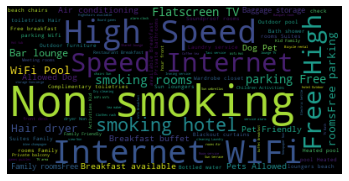

In [34]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Frequency Tables

In [35]:
all_amenities = []

In [36]:
for row in data.amenities.values:

    a = literal_eval(row)
    all_amenities = all_amenities + a

In [37]:
all_amenities

['Free parking',
 'Free High Speed Internet (WiFi)',
 'Bar / lounge',
 'Beach',
 'Hiking',
 'Pets Allowed ( Dog / Pet Friendly )',
 'Baggage storage',
 'Non-smoking hotel',
 'Wifi',
 'Restaurant',
 'Breakfast buffet',
 'Breakfast in the room',
 "Kids' meals",
 'Shared lounge / TV area',
 'Express check-in / check-out',
 'Soundproof rooms',
 'Safe',
 'Telephone',
 'Wake-up service / alarm clock',
 'Flatscreen TV',
 'Hair dryer',
 'Ocean view',
 'Non-smoking rooms',
 'Family rooms',
 'Paid public parking nearby',
 'Free High Speed Internet (WiFi)',
 'Hot tub',
 'Bar / lounge',
 'Babysitting',
 'Pets Allowed ( Dog / Pet Friendly )',
 'Taxi service',
 'Spa',
 'Parking',
 'Wifi',
 'Coffee shop',
 'Restaurant',
 'Breakfast available',
 'Breakfast buffet',
 'Breakfast in the room',
 'Wine / champagne',
 'Massage',
 'Concierge',
 'Non-smoking hotel',
 '24-hour check-in',
 '24-hour front desk',
 'Dry cleaning',
 'Laundry service',
 'Soundproof rooms',
 'Bathrobes',
 'Air conditioning',
 'Desk',

In [38]:
len(all_amenities)

98291

In [39]:
len(set(all_amenities))

269

In [40]:
frquency_talbles = {amentie:0 for amentie in set(all_amenities) }

In [41]:
for amentie in all_amenities:
    frquency_talbles[amentie] += 1

In [42]:
frquency_talbles

{'Outdoor pool': 1081,
 'Kids pool': 102,
 'Paid private parking on-site': 200,
 'Clothes dryer': 163,
 'Poolside bar': 199,
 'Wifi': 2544,
 'Rooftop pool': 17,
 'Full body massage': 419,
 'Raquetball': 1,
 'Taxi service': 596,
 'Darts': 68,
 'Patio': 57,
 'Foot bath': 26,
 'Free private parking nearby': 9,
 "Children's playground": 191,
 'Interconnected rooms available': 348,
 'Tennis court offsite': 155,
 'Mosquito net': 35,
 'Private bathrooms': 820,
 'Makeup services': 67,
 'Personal trainer': 65,
 'Free shuttle or taxi services': 34,
 'Bath / shower': 1050,
 'Dishwasher': 174,
 'Restaurant': 1105,
 'Desk': 771,
 'Conference facilities': 393,
 'Outdoor furniture': 908,
 '24-hour check-in': 446,
 'Board games / puzzles': 607,
 'Complimentary Instant Coffee': 408,
 'Free public parking nearby': 80,
 'Bicycle rental': 615,
 'Hot spring bath': 15,
 'Suites': 1276,
 'Pedicure': 104,
 'Karaoke': 42,
 'Golf course': 92,
 'Aerobics offsite': 14,
 'Pool view': 201,
 'Outdoor dining area': 2

In [43]:
sorter_frequency_table = {k: v for k, v in sorted(frquency_talbles.items(), key=lambda item: item[1], reverse=True)}

In [44]:
sorter_frequency_table

{'Non-smoking rooms': 2641,
 'Wifi': 2544,
 'Free High Speed Internet (WiFi)': 2437,
 'Non-smoking hotel': 2283,
 'Free parking': 2009,
 'Flatscreen TV': 1891,
 'Family rooms': 1688,
 'Hair dryer': 1509,
 'Bar / lounge': 1415,
 'Air conditioning': 1391,
 'Breakfast available': 1341,
 'Pets Allowed ( Dog / Pet Friendly )': 1333,
 'Pool': 1328,
 'Breakfast buffet': 1302,
 'Suites': 1276,
 'Baggage storage': 1274,
 'Safe': 1267,
 'Complimentary toiletries': 1193,
 'Housekeeping': 1151,
 'Restaurant': 1105,
 'Outdoor pool': 1081,
 'Soundproof rooms': 1059,
 'Bath / shower': 1050,
 'Laundry service': 1026,
 'Free breakfast': 967,
 'Breakfast in the room': 965,
 'Hiking': 951,
 'Outdoor furniture': 908,
 'Concierge': 840,
 'Heated pool': 831,
 'Private bathrooms': 820,
 'Wardrobe / closet': 801,
 'Telephone': 799,
 'Newspaper': 784,
 'Blackout curtains': 784,
 'Desk': 771,
 'Bottled water': 768,
 'Sun loungers / beach chairs': 762,
 'Private balcony': 747,
 'Minibar': 741,
 '24-hour front de

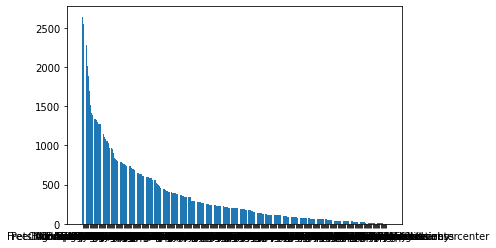

In [45]:
plt.bar(*zip(*sorter_frequency_table.items()))
plt.show()

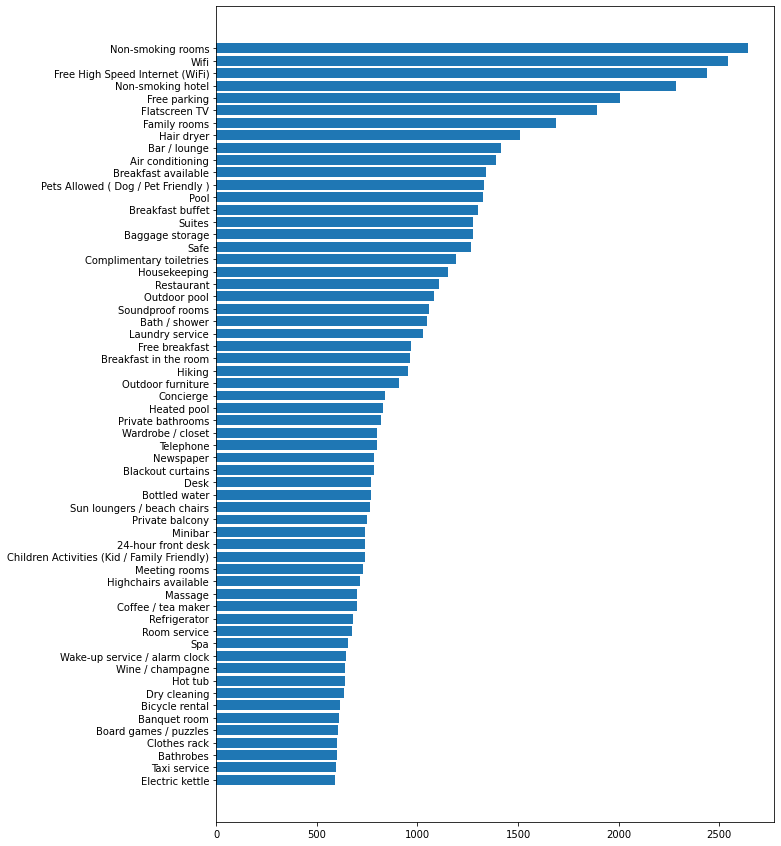

In [45]:
M = 60
plt.figure(figsize=(10,15))
values = list(sorter_frequency_table.values())[:M]
keys = list(sorter_frequency_table.keys())[:M]
plt.barh(range(M), values[::-1], align='center')
plt.yticks(range(M),keys[::-1],rotation=0)

plt.show()

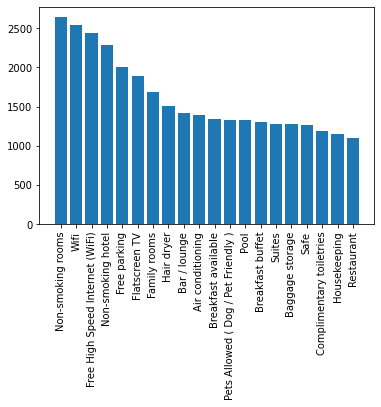

In [46]:
M = 20
values = list(sorter_frequency_table.values())[:M]
keys = list(sorter_frequency_table.keys())[:M]
plt.bar(range(M), values, align='center')
plt.xticks(range(M),keys,rotation=90)

plt.show()

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           2904 non-null   int64  
 1   link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             523 non-null    object 
 5   hotel_experience   2903 non-null   object 
 6   price              1219 non-null   float64
 7   review             2904 non-null   int64  
 8   rating             2903 non-null   float64
 9   amenities          2904 non-null   object 
 10  rank               2526 non-null   object 
 11  description        2880 non-null   object 
 12  grade_walkers      1499 non-null   object 
 13  n_nearrestaurants  1499 non-null   object 
 14  n_nearattractions  1499 non-null   object 
 15  note_location      2901 non-null   float64
 16  note_cleanliness   2900 

### n_nearresturants

In [50]:
data.n_nearrestaurants.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2904 entries, 0 to 2903
Series name: n_nearrestaurants
Non-Null Count  Dtype 
--------------  ----- 
1499 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


In [51]:
data.n_nearrestaurants = data.n_nearrestaurants.astype(float)

### n_nearattractions

In [52]:
data.n_nearattractions = data.n_nearattractions.astype(float)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           2904 non-null   int64  
 1   link               2904 non-null   object 
 2   name               2904 non-null   object 
 3   address            2904 non-null   object 
 4   number             523 non-null    object 
 5   hotel_experience   2903 non-null   object 
 6   price              1219 non-null   float64
 7   review             2904 non-null   int64  
 8   rating             2903 non-null   float64
 9   amenities          2904 non-null   object 
 10  rank               2526 non-null   object 
 11  description        2880 non-null   object 
 12  grade_walkers      1499 non-null   float64
 13  n_nearrestaurants  1499 non-null   float64
 14  n_nearattractions  1499 non-null   float64
 15  note_location      2901 non-null   float64
 16  note_cleanliness   2900 